In [1]:
import os
import time
import cv2
import tensorflow as tf 
import numpy as np 
import sklearn

In [2]:
Datas = 'Fleurs/flowers'
Dataset = []
Categories = ["daisy","dandelion",'rose','tulip','sunflower']
for category in Categories : 
    counter = 0
    if (category == "daisy"):
        a = [1,0,0,0,0]
    if (category == "dandelion"):
        a = [0,1,0,0,0]
    if (category == "rose"):
        a = [0,0,1,0,0]
    if (category == "tulip"):
        a = [0,0,0,1,0]
    if (category == "sunflower"):
        a = [0,0,0,0,1]
                        

    PATH = os.path.join(Datas,category)
    
    for el in os.listdir(PATH):
        counter +=1
        if(counter<=733):
            img = cv2.imread(os.path.join(PATH,el))
            img = cv2.resize(img, (96,96))
            Dataset.append([img, a])
    

In [3]:
len(Dataset)
import random as rd
rd.shuffle(Dataset)

In [4]:
X = []
y = [] 

for el in Dataset : 
    X.append(el[0])
    y.append(el[1])
X = np.array(X).reshape(-1, 96,96,3)
y = np.array(y)
print(X.shape)

(3665, 96, 96, 3)


In [5]:
print(X)

[[[[ 52  60  57]
   [121 165 160]
   [100 129 115]
   ...
   [ 24  53  53]
   [ 23  86  80]
   [ 16  47  29]]

  [[ 12 168 146]
   [ 90  93  89]
   [ 91 133 145]
   ...
   [104  85 124]
   [  8  23  26]
   [  5  13   3]]

  [[ 25 109  87]
   [111 104  78]
   [195 194 202]
   ...
   [ 72 155 143]
   [ 10  42  47]
   [ 17 132 108]]

  ...

  [[119  67  36]
   [ 19  41  31]
   [ 46  33  19]
   ...
   [ 42  48  62]
   [ 20  21  24]
   [ 12  16  22]]

  [[ 11  39  17]
   [ 43  59  84]
   [  8  36  21]
   ...
   [ 17  14  23]
   [ 26  33  42]
   [ 29  32  43]]

  [[ 65  96  57]
   [ 94  44  28]
   [  6  37  18]
   ...
   [ 43  58  55]
   [101 110 116]
   [ 24  25  29]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [6]:
def split(X,y, split_ratio = 0.2):
    num_train = int(X.shape[0]* (1-split_ratio))
    X_train = X[:num_train]
    X_test = X[num_train:]
    y_train = y[:num_train]
    y_test = y[num_train:]
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = split(X, y)
X_train = X_train/255
X_test = X_test/255


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Activation, MaxPooling2D,BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3),padding = 'same', activation = 'relu', input_shape = X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),activation = 'relu' ,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3),activation = 'relu' ,padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Dense(5))
model.add(Activation('softmax'))





In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'CategoricalCrossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [192]:
call_list = [tf.keras.callbacks.EarlyStopping(patience = 100)]
NB_epochs = 100
BATCH_size = 32
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=NB_epochs,
                    batch_size=BATCH_size,
                    callbacks= call_list
                    )

Epoch 1/100
92/92 [==============================] - 3s 23ms/step - loss: 27.5857 - accuracy: 0.2442 - val_loss: 1.8533 - val_accuracy: 0.2101
Epoch 2/100
92/92 [==============================] - 2s 21ms/step - loss: 1.5980 - accuracy: 0.2524 - val_loss: 2.0679 - val_accuracy: 0.2101
Epoch 3/100
92/92 [==============================] - 2s 21ms/step - loss: 1.5626 - accuracy: 0.2954 - val_loss: 1.8602 - val_accuracy: 0.2810
Epoch 4/100
92/92 [==============================] - 2s 21ms/step - loss: 1.5236 - accuracy: 0.3121 - val_loss: 1.6378 - val_accuracy: 0.2306
Epoch 5/100
92/92 [==============================] - 2s 21ms/step - loss: 1.4902 - accuracy: 0.3213 - val_loss: 1.5543 - val_accuracy: 0.2892
Epoch 6/100
92/92 [==============================] - 2s 21ms/step - loss: 1.4806 - accuracy: 0.3339 - val_loss: 1.6362 - val_accuracy: 0.2483
Epoch 7/100
92/92 [==============================] - 2s 21ms/step - loss: 1.4576 - accuracy: 0.3574 - val_loss: 1.5516 - val_accuracy: 0.3411
Epoch

KeyboardInterrupt: 

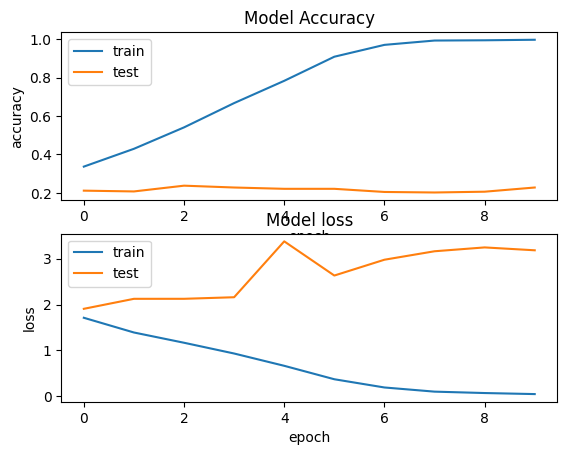

In [68]:
import matplotlib.pyplot as plt 

fig, axis = plt.subplots(2)
#fig.suptitle('Accuracy and loss')

axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].set_title('Model Accuracy')
axis[0].set_ylabel('accuracy')
axis[0].set_xlabel('epoch')
axis[0].legend(['train', 'test'])

axis[1].plot(history.history['loss'])
axis[1].plot(1*(history.history['val_loss']))
axis[1].set_title('Model loss')
axis[1].set_ylabel('loss')
axis[1].set_xlabel('epoch')
axis[1].legend(['train', 'test'])

In [12]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 5,
                                         width_shift_range = 0.15,
                                         height_shift_range = 0.15,
                                         horizontal_flip = True,
                   
                                         zoom_range = 0.15,
                                         )

In [217]:
call_list = [tf.keras.callbacks.EarlyStopping(patience = 100)]
NB_epochs = 100
BATCH_size = 32

history = model.fit(x = datagen.flow(X_train, y_train, batch_size=BATCH_size),
                    validation_data=(X_test, y_test),
                    epochs=NB_epochs,
                    batch_size=BATCH_size,
                    callbacks= call_list
                    )

Epoch 1/100
92/92 [==============================] - 5s 44ms/step - loss: 1.5486 - accuracy: 0.4407 - val_loss: 5.3925 - val_accuracy: 0.1787
Epoch 2/100
92/92 [==============================] - 4s 40ms/step - loss: 1.2636 - accuracy: 0.5113 - val_loss: 4.3166 - val_accuracy: 0.1787
Epoch 3/100
92/92 [==============================] - 4s 42ms/step - loss: 1.1917 - accuracy: 0.5297 - val_loss: 3.2189 - val_accuracy: 0.1787
Epoch 4/100
92/92 [==============================] - 4s 41ms/step - loss: 1.1102 - accuracy: 0.5716 - val_loss: 3.3183 - val_accuracy: 0.1869
Epoch 5/100
92/92 [==============================] - 4s 41ms/step - loss: 1.0470 - accuracy: 0.5986 - val_loss: 2.0449 - val_accuracy: 0.2838
Epoch 6/100
92/92 [==============================] - 4s 41ms/step - loss: 1.0185 - accuracy: 0.6033 - val_loss: 1.7587 - val_accuracy: 0.3793
Epoch 7/100
92/92 [==============================] - 4s 41ms/step - loss: 0.9341 - accuracy: 0.6443 - val_loss: 1.6880 - val_accuracy: 0.4652
Epoch 

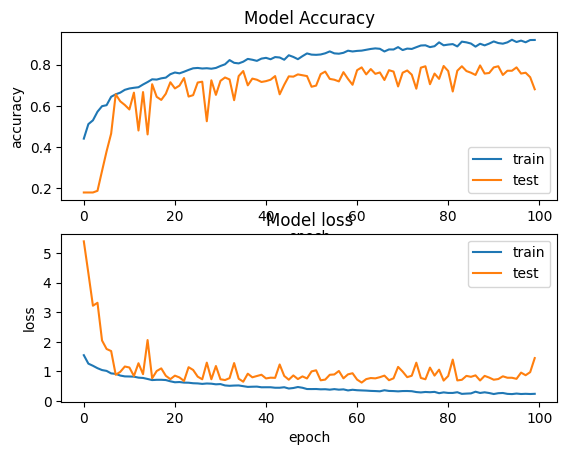

In [218]:
import matplotlib.pyplot as plt 

fig, axis = plt.subplots(2)
#fig.suptitle('Accuracy and loss')

axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].set_title('Model Accuracy')
axis[0].set_ylabel('accuracy')
axis[0].set_xlabel('epoch')
axis[0].legend(['train', 'test'])

axis[1].plot(history.history['loss'])
axis[1].plot(1*(history.history['val_loss']))
axis[1].set_title('Model loss')
axis[1].set_ylabel('loss')
axis[1].set_xlabel('epoch')
axis[1].legend(['train', 'test'])

In [13]:
from tensorflow.keras.callbacks import TensorBoard
tB = TensorBoard()
NB_epochs = 25
BATCH_size = 32

history = model.fit(x = datagen.flow(X_train, y_train, batch_size=BATCH_size),
                    validation_data=(X_test, y_test),
                    epochs=NB_epochs,
                    batch_size=BATCH_size,
                    callbacks= tB
                    )

Epoch 1/100
92/92 [==============================] - 11s 49ms/step - loss: 1.5739 - accuracy: 0.4209 - val_loss: 5.6822 - val_accuracy: 0.1924
Epoch 2/100
92/92 [==============================] - 4s 41ms/step - loss: 1.2576 - accuracy: 0.5205 - val_loss: 5.6366 - val_accuracy: 0.1924
Epoch 3/100
92/92 [==============================] - 4s 42ms/step - loss: 1.1665 - accuracy: 0.5341 - val_loss: 4.3077 - val_accuracy: 0.1924
Epoch 4/100
92/92 [==============================] - 4s 42ms/step - loss: 1.1040 - accuracy: 0.5682 - val_loss: 2.9706 - val_accuracy: 0.2824
Epoch 5/100
92/92 [==============================] - 4s 41ms/step - loss: 1.0286 - accuracy: 0.6078 - val_loss: 2.2031 - val_accuracy: 0.2838
Epoch 6/100
92/92 [==============================] - 4s 41ms/step - loss: 0.9651 - accuracy: 0.6235 - val_loss: 1.3386 - val_accuracy: 0.4898
Epoch 7/100
92/92 [==============================] - 4s 41ms/step - loss: 0.9146 - accuracy: 0.6473 - val_loss: 1.0838 - val_accuracy: 0.5634
Epoch

KeyboardInterrupt: 

In [14]:
import time
from tensorflow.keras.callbacks import TensorBoard
nb_convs = [2,3,4]
nb_denses = [1,2,3]
nb_filtres = [64, 128, 256]
for nb_conv in nb_convs:
    for nb_dense in nb_denses:
        for nb_filtre in nb_filtres:
            model = Sequential()
            for i in range(nb_conv):
                model.add(Conv2D(nb_filtre,(3,3),input_shape=X_train.shape[1:]))
                model.add(Activation('relu'))
                model.add(BatchNormalization())
                model.add(MaxPooling2D(pool_size=(2,2)))
                model.add(Dropout(0.25))
            model.add(Flatten())
            for i in range(nb_dense):
                model.add(Dense(256))
                model.add(Activation('relu'))
            model.add(Dense(5))
            model.add(Activation('softmax'))
            model.compile(loss = 'CategoricalCrossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])
            Name = "{}-conv-{}-layer_size-{}-dense-{}".format(nb_conv,nb_filtre, nb_dense,int(time.time()))

            tB = TensorBoard(log_dir="logs/{}".format(Name))
            NB_epochs = 25
            BATCH_size = 32
            history = model.fit(x = datagen.flow(X_train, y_train, batch_size=BATCH_size),
                    validation_data=(X_test, y_test),
                    epochs=NB_epochs,
                    callbacks= tB
                    )
            model.save("Name")

Epoch 1/25
92/92 [==============================] - 5s 48ms/step - loss: 3.6119 - accuracy: 0.4376 - val_loss: 17.0792 - val_accuracy: 0.2715
Epoch 2/25
92/92 [==============================] - 4s 41ms/step - loss: 1.2040 - accuracy: 0.5266 - val_loss: 20.7499 - val_accuracy: 0.3615
Epoch 3/25
92/92 [==============================] - 4s 41ms/step - loss: 1.1119 - accuracy: 0.5805 - val_loss: 23.6256 - val_accuracy: 0.3779
Epoch 4/25
92/92 [==============================] - 4s 42ms/step - loss: 1.0670 - accuracy: 0.5897 - val_loss: 17.6787 - val_accuracy: 0.3151
Epoch 5/25
92/92 [==============================] - 4s 43ms/step - loss: 1.0436 - accuracy: 0.5928 - val_loss: 14.3244 - val_accuracy: 0.3561
Epoch 6/25
92/92 [==============================] - 4s 48ms/step - loss: 1.0143 - accuracy: 0.6050 - val_loss: 5.2946 - val_accuracy: 0.3397
Epoch 7/25
92/92 [==============================] - 4s 43ms/step - loss: 0.9487 - accuracy: 0.6436 - val_loss: 1.7888 - val_accuracy: 0.5416
Epoch 8/

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 8s 67ms/step - loss: 6.7302 - accuracy: 0.3707 - val_loss: 47.6847 - val_accuracy: 0.1855
Epoch 2/25
92/92 [==============================] - 5s 53ms/step - loss: 1.6025 - accuracy: 0.4236 - val_loss: 60.2205 - val_accuracy: 0.2005
Epoch 3/25
92/92 [==============================] - 5s 53ms/step - loss: 1.3136 - accuracy: 0.4478 - val_loss: 62.6976 - val_accuracy: 0.2333
Epoch 4/25
92/92 [==============================] - 5s 53ms/step - loss: 1.2669 - accuracy: 0.4621 - val_loss: 46.0044 - val_accuracy: 0.2851
Epoch 5/25
92/92 [==============================] - 5s 53ms/step - loss: 1.1796 - accuracy: 0.4986 - val_loss: 17.9808 - val_accuracy: 0.3834
Epoch 6/25
92/92 [==============================] - 5s 53ms/step - loss: 1.1279 - accuracy: 0.5368 - val_loss: 5.8678 - val_accuracy: 0.4638
Epoch 7/25
92/92 [==============================] - 5s 53ms/step - loss: 1.1199 - accuracy: 0.5628 - val_loss: 1.9825 - val_accuracy: 0.4434
Epoch 8/

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 20s 167ms/step - loss: 16.6715 - accuracy: 0.3216 - val_loss: 36.0378 - val_accuracy: 0.2374
Epoch 2/25
92/92 [==============================] - 12s 126ms/step - loss: 1.6231 - accuracy: 0.3158 - val_loss: 58.6167 - val_accuracy: 0.2483
Epoch 3/25
92/92 [==============================] - 12s 126ms/step - loss: 1.7300 - accuracy: 0.3704 - val_loss: 10.9984 - val_accuracy: 0.3315
Epoch 4/25
92/92 [==============================] - 12s 126ms/step - loss: 1.3884 - accuracy: 0.4212 - val_loss: 21.8265 - val_accuracy: 0.3656
Epoch 5/25
92/92 [==============================] - 12s 126ms/step - loss: 1.2784 - accuracy: 0.4574 - val_loss: 10.5486 - val_accuracy: 0.4079
Epoch 6/25
92/92 [==============================] - 12s 126ms/step - loss: 1.2459 - accuracy: 0.4748 - val_loss: 5.9100 - val_accuracy: 0.4447
Epoch 7/25
92/92 [==============================] - 12s 126ms/step - loss: 1.1908 - accuracy: 0.4860 - val_loss: 2.8550 - val_accuracy: 

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 5s 44ms/step - loss: 2.8835 - accuracy: 0.4065 - val_loss: 9.5994 - val_accuracy: 0.2128
Epoch 2/25
92/92 [==============================] - 4s 41ms/step - loss: 1.4305 - accuracy: 0.5014 - val_loss: 16.8815 - val_accuracy: 0.2851
Epoch 3/25
92/92 [==============================] - 4s 41ms/step - loss: 1.3171 - accuracy: 0.5075 - val_loss: 18.8834 - val_accuracy: 0.2865
Epoch 4/25
92/92 [==============================] - 4s 42ms/step - loss: 1.1826 - accuracy: 0.5450 - val_loss: 9.0393 - val_accuracy: 0.2156
Epoch 5/25
92/92 [==============================] - 4s 42ms/step - loss: 1.1623 - accuracy: 0.5573 - val_loss: 5.9934 - val_accuracy: 0.2797
Epoch 6/25
92/92 [==============================] - 4s 41ms/step - loss: 1.0676 - accuracy: 0.5907 - val_loss: 2.0539 - val_accuracy: 0.4202
Epoch 7/25
92/92 [==============================] - 4s 41ms/step - loss: 0.9882 - accuracy: 0.6296 - val_loss: 1.6761 - val_accuracy: 0.4734
Epoch 8/25


INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 6s 56ms/step - loss: 5.5942 - accuracy: 0.3868 - val_loss: 21.4758 - val_accuracy: 0.1692
Epoch 2/25
92/92 [==============================] - 5s 52ms/step - loss: 1.6776 - accuracy: 0.4598 - val_loss: 19.2244 - val_accuracy: 0.1924
Epoch 3/25
92/92 [==============================] - 5s 52ms/step - loss: 1.3592 - accuracy: 0.4973 - val_loss: 5.6728 - val_accuracy: 0.1951
Epoch 4/25
92/92 [==============================] - 5s 52ms/step - loss: 1.2965 - accuracy: 0.5147 - val_loss: 6.0257 - val_accuracy: 0.2647
Epoch 5/25
92/92 [==============================] - 5s 52ms/step - loss: 1.2562 - accuracy: 0.5259 - val_loss: 1.9398 - val_accuracy: 0.3397
Epoch 6/25
92/92 [==============================] - 5s 52ms/step - loss: 1.1529 - accuracy: 0.5624 - val_loss: 3.0518 - val_accuracy: 0.3970
Epoch 7/25
92/92 [==============================] - 5s 52ms/step - loss: 1.1132 - accuracy: 0.5774 - val_loss: 1.2473 - val_accuracy: 0.5116
Epoch 8/25


INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 12s 128ms/step - loss: 10.6955 - accuracy: 0.3782 - val_loss: 23.6635 - val_accuracy: 0.1869
Epoch 2/25
92/92 [==============================] - 12s 125ms/step - loss: 2.3995 - accuracy: 0.4400 - val_loss: 23.6378 - val_accuracy: 0.2292
Epoch 3/25
92/92 [==============================] - 12s 125ms/step - loss: 1.6539 - accuracy: 0.4427 - val_loss: 29.0691 - val_accuracy: 0.2005
Epoch 4/25
92/92 [==============================] - 12s 125ms/step - loss: 1.3255 - accuracy: 0.4737 - val_loss: 19.6245 - val_accuracy: 0.1951
Epoch 5/25
92/92 [==============================] - 12s 125ms/step - loss: 1.2322 - accuracy: 0.5119 - val_loss: 6.5098 - val_accuracy: 0.2851
Epoch 6/25
92/92 [==============================] - 12s 125ms/step - loss: 1.2127 - accuracy: 0.5055 - val_loss: 1.6361 - val_accuracy: 0.4611
Epoch 7/25
92/92 [==============================] - 12s 125ms/step - loss: 1.2141 - accuracy: 0.5116 - val_loss: 1.3052 - val_accuracy: 0

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 5s 44ms/step - loss: 2.2271 - accuracy: 0.3997 - val_loss: 8.1204 - val_accuracy: 0.1855
Epoch 2/25
92/92 [==============================] - 4s 41ms/step - loss: 1.3055 - accuracy: 0.5082 - val_loss: 4.4286 - val_accuracy: 0.2183
Epoch 3/25
92/92 [==============================] - 4s 42ms/step - loss: 1.2261 - accuracy: 0.5307 - val_loss: 4.0822 - val_accuracy: 0.2810
Epoch 4/25
92/92 [==============================] - 4s 42ms/step - loss: 1.1167 - accuracy: 0.5638 - val_loss: 5.1832 - val_accuracy: 0.3056
Epoch 5/25
92/92 [==============================] - 5s 53ms/step - loss: 1.0459 - accuracy: 0.5808 - val_loss: 2.1939 - val_accuracy: 0.3874
Epoch 6/25
92/92 [==============================] - 5s 50ms/step - loss: 1.0054 - accuracy: 0.6105 - val_loss: 1.4917 - val_accuracy: 0.4461
Epoch 7/25
92/92 [==============================] - 5s 50ms/step - loss: 0.9133 - accuracy: 0.6422 - val_loss: 1.5187 - val_accuracy: 0.4775
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 6s 56ms/step - loss: 3.4396 - accuracy: 0.3844 - val_loss: 8.0598 - val_accuracy: 0.2087
Epoch 2/25
92/92 [==============================] - 5s 53ms/step - loss: 1.4471 - accuracy: 0.4720 - val_loss: 7.8412 - val_accuracy: 0.1924
Epoch 3/25
92/92 [==============================] - 5s 53ms/step - loss: 1.2977 - accuracy: 0.5010 - val_loss: 8.1759 - val_accuracy: 0.1924
Epoch 4/25
92/92 [==============================] - 5s 53ms/step - loss: 1.2576 - accuracy: 0.5201 - val_loss: 6.9575 - val_accuracy: 0.1924
Epoch 5/25
92/92 [==============================] - 5s 53ms/step - loss: 1.1752 - accuracy: 0.5382 - val_loss: 2.1349 - val_accuracy: 0.3452
Epoch 6/25
92/92 [==============================] - 5s 53ms/step - loss: 1.0924 - accuracy: 0.5662 - val_loss: 2.0870 - val_accuracy: 0.4270
Epoch 7/25
92/92 [==============================] - 5s 53ms/step - loss: 1.0288 - accuracy: 0.6047 - val_loss: 1.5319 - val_accuracy: 0.4584
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 12s 127ms/step - loss: 8.3593 - accuracy: 0.3646 - val_loss: 5.9854 - val_accuracy: 0.3124
Epoch 2/25
92/92 [==============================] - 11s 124ms/step - loss: 2.8832 - accuracy: 0.4008 - val_loss: 3.9494 - val_accuracy: 0.2237
Epoch 3/25
92/92 [==============================] - 11s 124ms/step - loss: 1.9134 - accuracy: 0.4335 - val_loss: 6.6013 - val_accuracy: 0.2578
Epoch 4/25
92/92 [==============================] - 11s 124ms/step - loss: 1.6037 - accuracy: 0.4499 - val_loss: 4.9148 - val_accuracy: 0.2715
Epoch 5/25
92/92 [==============================] - 11s 124ms/step - loss: 1.3302 - accuracy: 0.4986 - val_loss: 2.5480 - val_accuracy: 0.3042
Epoch 6/25
92/92 [==============================] - 11s 124ms/step - loss: 1.2345 - accuracy: 0.5242 - val_loss: 2.2351 - val_accuracy: 0.3370
Epoch 7/25
92/92 [==============================] - 11s 124ms/step - loss: 1.1670 - accuracy: 0.5617 - val_loss: 1.2846 - val_accuracy: 0.4802

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 5s 45ms/step - loss: 1.7601 - accuracy: 0.4734 - val_loss: 3.2662 - val_accuracy: 0.1965
Epoch 2/25
92/92 [==============================] - 4s 42ms/step - loss: 1.1402 - accuracy: 0.5460 - val_loss: 2.5379 - val_accuracy: 0.2333
Epoch 3/25
92/92 [==============================] - 4s 42ms/step - loss: 1.0481 - accuracy: 0.5914 - val_loss: 3.5209 - val_accuracy: 0.2278
Epoch 4/25
92/92 [==============================] - 4s 42ms/step - loss: 1.0227 - accuracy: 0.6078 - val_loss: 1.4927 - val_accuracy: 0.4652
Epoch 5/25
92/92 [==============================] - 4s 42ms/step - loss: 0.9554 - accuracy: 0.6344 - val_loss: 1.6826 - val_accuracy: 0.4256
Epoch 6/25
92/92 [==============================] - 4s 42ms/step - loss: 0.8834 - accuracy: 0.6610 - val_loss: 1.5887 - val_accuracy: 0.4939
Epoch 7/25
92/92 [==============================] - 4s 43ms/step - loss: 0.8714 - accuracy: 0.6702 - val_loss: 1.1466 - val_accuracy: 0.6044
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 6s 59ms/step - loss: 2.4446 - accuracy: 0.4349 - val_loss: 2.3301 - val_accuracy: 0.2087
Epoch 2/25
92/92 [==============================] - 5s 54ms/step - loss: 1.2124 - accuracy: 0.5331 - val_loss: 1.8689 - val_accuracy: 0.3179
Epoch 3/25
92/92 [==============================] - 5s 55ms/step - loss: 1.1294 - accuracy: 0.5501 - val_loss: 2.2581 - val_accuracy: 0.2074
Epoch 4/25
92/92 [==============================] - 5s 55ms/step - loss: 1.0256 - accuracy: 0.6013 - val_loss: 2.5010 - val_accuracy: 0.2647
Epoch 5/25
92/92 [==============================] - 5s 55ms/step - loss: 1.0062 - accuracy: 0.6064 - val_loss: 1.9866 - val_accuracy: 0.3943
Epoch 6/25
92/92 [==============================] - 5s 55ms/step - loss: 0.9628 - accuracy: 0.6344 - val_loss: 3.0223 - val_accuracy: 0.3643
Epoch 7/25
92/92 [==============================] - 6s 62ms/step - loss: 0.9490 - accuracy: 0.6320 - val_loss: 1.1146 - val_accuracy: 0.5907
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 15s 142ms/step - loss: 4.3944 - accuracy: 0.3823 - val_loss: 1.7424 - val_accuracy: 0.2046
Epoch 2/25
92/92 [==============================] - 12s 132ms/step - loss: 1.3195 - accuracy: 0.4744 - val_loss: 2.4996 - val_accuracy: 0.2074
Epoch 3/25
92/92 [==============================] - 12s 132ms/step - loss: 1.2088 - accuracy: 0.5198 - val_loss: 2.0611 - val_accuracy: 0.2974
Epoch 4/25
92/92 [==============================] - 12s 132ms/step - loss: 1.1761 - accuracy: 0.5286 - val_loss: 2.1657 - val_accuracy: 0.2933
Epoch 5/25
92/92 [==============================] - 12s 132ms/step - loss: 1.0566 - accuracy: 0.5802 - val_loss: 1.4092 - val_accuracy: 0.4475
Epoch 6/25
92/92 [==============================] - 12s 131ms/step - loss: 1.0238 - accuracy: 0.6020 - val_loss: 1.3071 - val_accuracy: 0.4611
Epoch 7/25
92/92 [==============================] - 12s 132ms/step - loss: 0.9946 - accuracy: 0.6037 - val_loss: 1.3504 - val_accuracy: 0.4884

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 5s 46ms/step - loss: 1.4828 - accuracy: 0.4488 - val_loss: 2.1425 - val_accuracy: 0.2060
Epoch 2/25
92/92 [==============================] - 4s 42ms/step - loss: 1.1695 - accuracy: 0.5256 - val_loss: 3.9184 - val_accuracy: 0.1924
Epoch 3/25
92/92 [==============================] - 4s 41ms/step - loss: 1.0781 - accuracy: 0.5614 - val_loss: 4.6635 - val_accuracy: 0.2797
Epoch 4/25
92/92 [==============================] - 4s 41ms/step - loss: 1.0298 - accuracy: 0.5986 - val_loss: 2.8361 - val_accuracy: 0.2838
Epoch 5/25
92/92 [==============================] - 4s 42ms/step - loss: 0.9813 - accuracy: 0.6153 - val_loss: 2.7148 - val_accuracy: 0.3465
Epoch 6/25
92/92 [==============================] - 4s 42ms/step - loss: 0.9338 - accuracy: 0.6409 - val_loss: 1.9330 - val_accuracy: 0.3888
Epoch 7/25
92/92 [==============================] - 4s 43ms/step - loss: 0.8605 - accuracy: 0.6681 - val_loss: 1.6380 - val_accuracy: 0.4625
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 6s 57ms/step - loss: 1.7877 - accuracy: 0.4297 - val_loss: 2.0480 - val_accuracy: 0.2156
Epoch 2/25
92/92 [==============================] - 5s 57ms/step - loss: 1.2860 - accuracy: 0.5041 - val_loss: 2.5495 - val_accuracy: 0.2278
Epoch 3/25
92/92 [==============================] - 5s 55ms/step - loss: 1.1448 - accuracy: 0.5471 - val_loss: 5.4050 - val_accuracy: 0.2237
Epoch 4/25
92/92 [==============================] - 5s 55ms/step - loss: 1.0815 - accuracy: 0.5846 - val_loss: 2.5859 - val_accuracy: 0.3220
Epoch 5/25
92/92 [==============================] - 5s 55ms/step - loss: 1.0034 - accuracy: 0.6050 - val_loss: 2.8185 - val_accuracy: 0.3151
Epoch 6/25
92/92 [==============================] - 5s 55ms/step - loss: 0.9662 - accuracy: 0.6456 - val_loss: 1.3315 - val_accuracy: 0.5143
Epoch 7/25
92/92 [==============================] - 5s 55ms/step - loss: 0.9155 - accuracy: 0.6494 - val_loss: 1.2599 - val_accuracy: 0.5143
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 13s 134ms/step - loss: 2.9995 - accuracy: 0.3915 - val_loss: 1.8947 - val_accuracy: 0.2224
Epoch 2/25
92/92 [==============================] - 12s 132ms/step - loss: 1.5496 - accuracy: 0.4570 - val_loss: 2.3652 - val_accuracy: 0.2660
Epoch 3/25
92/92 [==============================] - 12s 132ms/step - loss: 1.3587 - accuracy: 0.5007 - val_loss: 1.6375 - val_accuracy: 0.3574
Epoch 4/25
92/92 [==============================] - 12s 132ms/step - loss: 1.1777 - accuracy: 0.5317 - val_loss: 1.9714 - val_accuracy: 0.3015
Epoch 5/25
92/92 [==============================] - 12s 132ms/step - loss: 1.1430 - accuracy: 0.5587 - val_loss: 1.3562 - val_accuracy: 0.4857
Epoch 6/25
92/92 [==============================] - 12s 132ms/step - loss: 1.0675 - accuracy: 0.5856 - val_loss: 1.3613 - val_accuracy: 0.4407
Epoch 7/25
92/92 [==============================] - 12s 132ms/step - loss: 1.0355 - accuracy: 0.6010 - val_loss: 1.1842 - val_accuracy: 0.5334

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 5s 47ms/step - loss: 1.3924 - accuracy: 0.4601 - val_loss: 2.4231 - val_accuracy: 0.1855
Epoch 2/25
92/92 [==============================] - 4s 42ms/step - loss: 1.1352 - accuracy: 0.5385 - val_loss: 3.0674 - val_accuracy: 0.1924
Epoch 3/25
92/92 [==============================] - 4s 42ms/step - loss: 1.0290 - accuracy: 0.5887 - val_loss: 2.0994 - val_accuracy: 0.1992
Epoch 4/25
92/92 [==============================] - 4s 42ms/step - loss: 0.9875 - accuracy: 0.6098 - val_loss: 1.4419 - val_accuracy: 0.3970
Epoch 5/25
92/92 [==============================] - 4s 42ms/step - loss: 0.9239 - accuracy: 0.6351 - val_loss: 2.2751 - val_accuracy: 0.3302
Epoch 6/25
92/92 [==============================] - 4s 43ms/step - loss: 0.8727 - accuracy: 0.6661 - val_loss: 1.4336 - val_accuracy: 0.5252
Epoch 7/25
92/92 [==============================] - 4s 42ms/step - loss: 0.8627 - accuracy: 0.6685 - val_loss: 1.1506 - val_accuracy: 0.5130
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 6s 58ms/step - loss: 1.6955 - accuracy: 0.4383 - val_loss: 3.4356 - val_accuracy: 0.2551
Epoch 2/25
92/92 [==============================] - 5s 55ms/step - loss: 1.2103 - accuracy: 0.5304 - val_loss: 1.8227 - val_accuracy: 0.2756
Epoch 3/25
92/92 [==============================] - 5s 55ms/step - loss: 1.1146 - accuracy: 0.5553 - val_loss: 2.0924 - val_accuracy: 0.2865
Epoch 4/25
92/92 [==============================] - 5s 55ms/step - loss: 1.0146 - accuracy: 0.6044 - val_loss: 1.6700 - val_accuracy: 0.2660
Epoch 5/25
92/92 [==============================] - 5s 55ms/step - loss: 0.9645 - accuracy: 0.6143 - val_loss: 1.4254 - val_accuracy: 0.4407
Epoch 6/25
92/92 [==============================] - 5s 55ms/step - loss: 0.9383 - accuracy: 0.6450 - val_loss: 1.6361 - val_accuracy: 0.3984
Epoch 7/25
92/92 [==============================] - 5s 55ms/step - loss: 0.8963 - accuracy: 0.6501 - val_loss: 1.1974 - val_accuracy: 0.5430
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 13s 134ms/step - loss: 2.1726 - accuracy: 0.4055 - val_loss: 3.0823 - val_accuracy: 0.1746
Epoch 2/25
92/92 [==============================] - 12s 131ms/step - loss: 1.4235 - accuracy: 0.4771 - val_loss: 2.5805 - val_accuracy: 0.1855
Epoch 3/25
92/92 [==============================] - 12s 131ms/step - loss: 1.2756 - accuracy: 0.5109 - val_loss: 1.5539 - val_accuracy: 0.3111
Epoch 4/25
92/92 [==============================] - 12s 131ms/step - loss: 1.1589 - accuracy: 0.5495 - val_loss: 2.5888 - val_accuracy: 0.2033
Epoch 5/25
92/92 [==============================] - 12s 131ms/step - loss: 1.0540 - accuracy: 0.5859 - val_loss: 1.7149 - val_accuracy: 0.3356
Epoch 6/25
92/92 [==============================] - 12s 131ms/step - loss: 0.9877 - accuracy: 0.6173 - val_loss: 1.4461 - val_accuracy: 0.4475
Epoch 7/25
92/92 [==============================] - 12s 131ms/step - loss: 0.9633 - accuracy: 0.6320 - val_loss: 1.3355 - val_accuracy: 0.5048

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 5s 47ms/step - loss: 1.5074 - accuracy: 0.4505 - val_loss: 3.9949 - val_accuracy: 0.1924
Epoch 2/25
92/92 [==============================] - 4s 43ms/step - loss: 1.1473 - accuracy: 0.5454 - val_loss: 4.0150 - val_accuracy: 0.2046
Epoch 3/25
92/92 [==============================] - 4s 41ms/step - loss: 1.0532 - accuracy: 0.5887 - val_loss: 4.1404 - val_accuracy: 0.3124
Epoch 4/25
92/92 [==============================] - 4s 42ms/step - loss: 0.9669 - accuracy: 0.6248 - val_loss: 3.5920 - val_accuracy: 0.2469
Epoch 5/25
92/92 [==============================] - 4s 42ms/step - loss: 0.9435 - accuracy: 0.6293 - val_loss: 3.1403 - val_accuracy: 0.2688
Epoch 6/25
92/92 [==============================] - 4s 43ms/step - loss: 0.8960 - accuracy: 0.6552 - val_loss: 1.7333 - val_accuracy: 0.4734
Epoch 7/25
92/92 [==============================] - 4s 44ms/step - loss: 0.8610 - accuracy: 0.6743 - val_loss: 1.7652 - val_accuracy: 0.4939
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 6s 55ms/step - loss: 1.6246 - accuracy: 0.4632 - val_loss: 2.1915 - val_accuracy: 0.2551
Epoch 2/25
92/92 [==============================] - 5s 57ms/step - loss: 1.1412 - accuracy: 0.5495 - val_loss: 2.0456 - val_accuracy: 0.2333
Epoch 3/25
92/92 [==============================] - 6s 62ms/step - loss: 1.0596 - accuracy: 0.5904 - val_loss: 2.9866 - val_accuracy: 0.1910
Epoch 4/25
92/92 [==============================] - 7s 71ms/step - loss: 0.9820 - accuracy: 0.6211 - val_loss: 1.7326 - val_accuracy: 0.2769
Epoch 5/25
92/92 [==============================] - 7s 77ms/step - loss: 0.8958 - accuracy: 0.6467 - val_loss: 2.0544 - val_accuracy: 0.4038
Epoch 6/25
92/92 [==============================] - 7s 78ms/step - loss: 0.8942 - accuracy: 0.6569 - val_loss: 2.0594 - val_accuracy: 0.3997
Epoch 7/25
92/92 [==============================] - 2269s 25s/step - loss: 0.8442 - accuracy: 0.6862 - val_loss: 1.4372 - val_accuracy: 0.4693
Epoch 8/25


INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 12s 122ms/step - loss: 1.6822 - accuracy: 0.4615 - val_loss: 2.6370 - val_accuracy: 0.1855
Epoch 2/25
92/92 [==============================] - 11s 118ms/step - loss: 1.1869 - accuracy: 0.5344 - val_loss: 1.6368 - val_accuracy: 0.3001
Epoch 3/25
92/92 [==============================] - 11s 119ms/step - loss: 1.0799 - accuracy: 0.5781 - val_loss: 2.7506 - val_accuracy: 0.2524
Epoch 4/25
92/92 [==============================] - 11s 119ms/step - loss: 0.9754 - accuracy: 0.6156 - val_loss: 2.0937 - val_accuracy: 0.2879
Epoch 5/25
92/92 [==============================] - 11s 118ms/step - loss: 0.9263 - accuracy: 0.6426 - val_loss: 2.0407 - val_accuracy: 0.2551
Epoch 6/25
92/92 [==============================] - 11s 118ms/step - loss: 0.8705 - accuracy: 0.6675 - val_loss: 1.8287 - val_accuracy: 0.3643
Epoch 7/25
92/92 [==============================] - 11s 117ms/step - loss: 0.8319 - accuracy: 0.6913 - val_loss: 1.3510 - val_accuracy: 0.5143

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 6s 51ms/step - loss: 1.3594 - accuracy: 0.4635 - val_loss: 3.0456 - val_accuracy: 0.1924
Epoch 2/25
92/92 [==============================] - 5s 54ms/step - loss: 1.1424 - accuracy: 0.5324 - val_loss: 2.8926 - val_accuracy: 0.2988
Epoch 3/25
92/92 [==============================] - 5s 54ms/step - loss: 1.0462 - accuracy: 0.5856 - val_loss: 2.3073 - val_accuracy: 0.2497
Epoch 4/25
92/92 [==============================] - 5s 60ms/step - loss: 0.9877 - accuracy: 0.5900 - val_loss: 2.2364 - val_accuracy: 0.2715
Epoch 5/25
92/92 [==============================] - 5s 51ms/step - loss: 0.9289 - accuracy: 0.6470 - val_loss: 1.7828 - val_accuracy: 0.3847
Epoch 6/25
92/92 [==============================] - 5s 51ms/step - loss: 0.8803 - accuracy: 0.6658 - val_loss: 1.8358 - val_accuracy: 0.4775
Epoch 7/25
92/92 [==============================] - 5s 55ms/step - loss: 0.8651 - accuracy: 0.6712 - val_loss: 1.0846 - val_accuracy: 0.6003
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 6s 56ms/step - loss: 1.3765 - accuracy: 0.4826 - val_loss: 1.9102 - val_accuracy: 0.2374
Epoch 2/25
92/92 [==============================] - 5s 58ms/step - loss: 1.1358 - accuracy: 0.5406 - val_loss: 3.1106 - val_accuracy: 0.2933
Epoch 3/25
92/92 [==============================] - 6s 61ms/step - loss: 1.0555 - accuracy: 0.5808 - val_loss: 2.1326 - val_accuracy: 0.2838
Epoch 4/25
92/92 [==============================] - 6s 64ms/step - loss: 0.9087 - accuracy: 0.6443 - val_loss: 1.9694 - val_accuracy: 0.2920
Epoch 5/25
92/92 [==============================] - 6s 69ms/step - loss: 0.9031 - accuracy: 0.6565 - val_loss: 1.8563 - val_accuracy: 0.3670
Epoch 6/25
92/92 [==============================] - 7s 72ms/step - loss: 0.8592 - accuracy: 0.6692 - val_loss: 1.4079 - val_accuracy: 0.5102
Epoch 7/25
92/92 [==============================] - 7s 73ms/step - loss: 0.7966 - accuracy: 0.6965 - val_loss: 1.0569 - val_accuracy: 0.6153
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 12s 120ms/step - loss: 1.4629 - accuracy: 0.4458 - val_loss: 1.7332 - val_accuracy: 0.2060
Epoch 2/25
92/92 [==============================] - 11s 118ms/step - loss: 1.1930 - accuracy: 0.5232 - val_loss: 2.0753 - val_accuracy: 0.2510
Epoch 3/25
92/92 [==============================] - 3271s 36s/step - loss: 1.0913 - accuracy: 0.5668 - val_loss: 1.8689 - val_accuracy: 0.2251
Epoch 4/25
92/92 [==============================] - 11s 115ms/step - loss: 0.9955 - accuracy: 0.6064 - val_loss: 1.8430 - val_accuracy: 0.3247
Epoch 5/25
92/92 [==============================] - 11s 119ms/step - loss: 0.9482 - accuracy: 0.6381 - val_loss: 1.3753 - val_accuracy: 0.4188
Epoch 6/25
92/92 [==============================] - 11s 119ms/step - loss: 0.8973 - accuracy: 0.6525 - val_loss: 1.2869 - val_accuracy: 0.4911
Epoch 7/25
92/92 [==============================] - 11s 117ms/step - loss: 0.8532 - accuracy: 0.6808 - val_loss: 1.6755 - val_accuracy: 0.4748

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 6s 57ms/step - loss: 1.3146 - accuracy: 0.4618 - val_loss: 1.7558 - val_accuracy: 0.2756
Epoch 2/25
92/92 [==============================] - 5s 56ms/step - loss: 1.0909 - accuracy: 0.5641 - val_loss: 2.2224 - val_accuracy: 0.1924
Epoch 3/25
92/92 [==============================] - 6s 66ms/step - loss: 1.0145 - accuracy: 0.5952 - val_loss: 2.3035 - val_accuracy: 0.2960
Epoch 4/25
92/92 [==============================] - 6s 68ms/step - loss: 0.9618 - accuracy: 0.6221 - val_loss: 1.5200 - val_accuracy: 0.3151
Epoch 5/25
92/92 [==============================] - 5s 54ms/step - loss: 0.8961 - accuracy: 0.6596 - val_loss: 1.7399 - val_accuracy: 0.3574
Epoch 6/25
92/92 [==============================] - 6s 60ms/step - loss: 0.8694 - accuracy: 0.6497 - val_loss: 1.3031 - val_accuracy: 0.5034
Epoch 7/25
92/92 [==============================] - 5s 54ms/step - loss: 0.8376 - accuracy: 0.6716 - val_loss: 1.0722 - val_accuracy: 0.5566
Epoch 8/25
92

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 7s 62ms/step - loss: 1.3165 - accuracy: 0.4615 - val_loss: 1.5556 - val_accuracy: 0.2115
Epoch 2/25
92/92 [==============================] - 8s 88ms/step - loss: 1.1301 - accuracy: 0.5365 - val_loss: 1.6224 - val_accuracy: 0.3383
Epoch 3/25
92/92 [==============================] - 9s 100ms/step - loss: 1.0387 - accuracy: 0.5699 - val_loss: 2.1971 - val_accuracy: 0.1965
Epoch 4/25
92/92 [==============================] - 9s 98ms/step - loss: 0.9699 - accuracy: 0.6064 - val_loss: 1.9372 - val_accuracy: 0.2838
Epoch 5/25
92/92 [==============================] - 9s 93ms/step - loss: 0.9165 - accuracy: 0.6436 - val_loss: 1.5030 - val_accuracy: 0.4407
Epoch 6/25
92/92 [==============================] - 9s 102ms/step - loss: 0.8794 - accuracy: 0.6579 - val_loss: 1.3231 - val_accuracy: 0.5020
Epoch 7/25
92/92 [==============================] - 9s 99ms/step - loss: 0.8137 - accuracy: 0.6838 - val_loss: 1.5529 - val_accuracy: 0.4297
Epoch 8/25


INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets


Epoch 1/25
92/92 [==============================] - 12s 122ms/step - loss: 1.4172 - accuracy: 0.4314 - val_loss: 2.1733 - val_accuracy: 0.2005
Epoch 2/25
92/92 [==============================] - 11s 122ms/step - loss: 1.1564 - accuracy: 0.5385 - val_loss: 2.1658 - val_accuracy: 0.2920
Epoch 3/25
92/92 [==============================] - 13s 139ms/step - loss: 1.0756 - accuracy: 0.5829 - val_loss: 1.9688 - val_accuracy: 0.2060
Epoch 4/25
92/92 [==============================] - 14s 147ms/step - loss: 0.9899 - accuracy: 0.6166 - val_loss: 1.7289 - val_accuracy: 0.2660
Epoch 5/25
92/92 [==============================] - 14s 147ms/step - loss: 0.9170 - accuracy: 0.6453 - val_loss: 1.5346 - val_accuracy: 0.3220
Epoch 6/25
92/92 [==============================] - 14s 147ms/step - loss: 0.8783 - accuracy: 0.6596 - val_loss: 1.5769 - val_accuracy: 0.4270
Epoch 7/25
92/92 [==============================] - 14s 147ms/step - loss: 0.8351 - accuracy: 0.6862 - val_loss: 1.0681 - val_accuracy: 0.5484

INFO:tensorflow:Assets written to: Name\assets


INFO:tensorflow:Assets written to: Name\assets
